In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rcParams["font.size"] = 16

In [2]:
work_dir="/home/kahmadov/phd/migration"

with open(f'{work_dir}/results/results_fvm.pkl', 'rb') as f:
    results_fvm = pickle.load(f)

with open(f'{work_dir}/results/results_3dec.pkl', 'rb') as f:
    results_3dec = pickle.load(f)

with open(f'{work_dir}/results/parameters.pkl', 'rb') as f:
    parameters = pickle.load(f)

In [34]:
def to_mm(arr_like):
    # convert meters to milllimeters
    return arr_like*1e3
    
def plot_aperture_profile(ax, x_3dec, t_vals_3dec, w_data_3dec, x_fvm, w_xt_fvm,
                          t, dt_fvm, color, to_mm):
    """Plot fracture aperture profiles for a given time `t`."""
    # Compute indices for 3DEC and FVM data
    idx_t_fvm = int(t / dt_fvm) - 1
    idx_t_3dec = np.searchsorted(t_vals_3dec, t)

    # Plot data
    ax.plot(x_3dec, to_mm(w_data_3dec[idx_t_3dec, 1:]),
            label='3DEC', marker='^', linestyle='none', markersize=9,
            color=color, alpha=0.6)
    ax.plot(x_fvm, to_mm(w_xt_fvm[idx_t_fvm, :]),
            label='FVM', lw=3, color=color)

    # Add annotation
    x_annot = 2
    x_text = 2
    y_annot = to_mm(w_data_3dec[idx_t_3dec, np.searchsorted(x_3dec, x_annot)])
    y_text = to_mm(w_data_3dec[idx_t_3dec, np.searchsorted(x_3dec, x_annot)])

    ax.annotate(fr"$t={t:.1f}~\mathsf{{s}}$",
                xy=(x_annot, y_annot),
                xytext=(x_text, y_text),
                bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.5, edgecolor="k"),
                ha='left')
    
def plot_results_for_q(ax, results_3dec, results_fvm, q_0, t_values, t_fin):
    """Main wrapper: prepares data and plots aperture profiles for a given q₀."""
    # --- Load data ---
    w_data_3dec = results_3dec[q_0]['w']
    w_xt_fvm = results_fvm[q_0]['w']
    x_3dec = w_data_3dec[0, 1:]
    x_fvm = np.linspace(0, 100, w_xt_fvm.shape[1])
    t_vals_3dec = w_data_3dec[1:, 0]
    Nt_fvm = w_xt_fvm.shape[0]
    dt_fvm = t_fin / Nt_fvm

    # --- Plot ---
    colors = plt.cm.Greys(np.linspace(0.3, 0.8, len(t_values)))  # dark → light gray
    for t, color in zip(t_values, colors):
        plot_aperture_profile(ax, x_3dec, t_vals_3dec, w_data_3dec, x_fvm, w_xt_fvm,
                              t, dt_fvm, color, to_mm)

    # --- Legend (remove duplicates) ---
    handles, labels = ax.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax.legend(unique.values(), unique.keys(), frameon=False)

    # --- Labels & formatting ---
    
    ax.set_title(fr"Applied injection rate: $q_0 = {q_0:.0e}~\mathsf{{m^2/s}}$")
    return ax

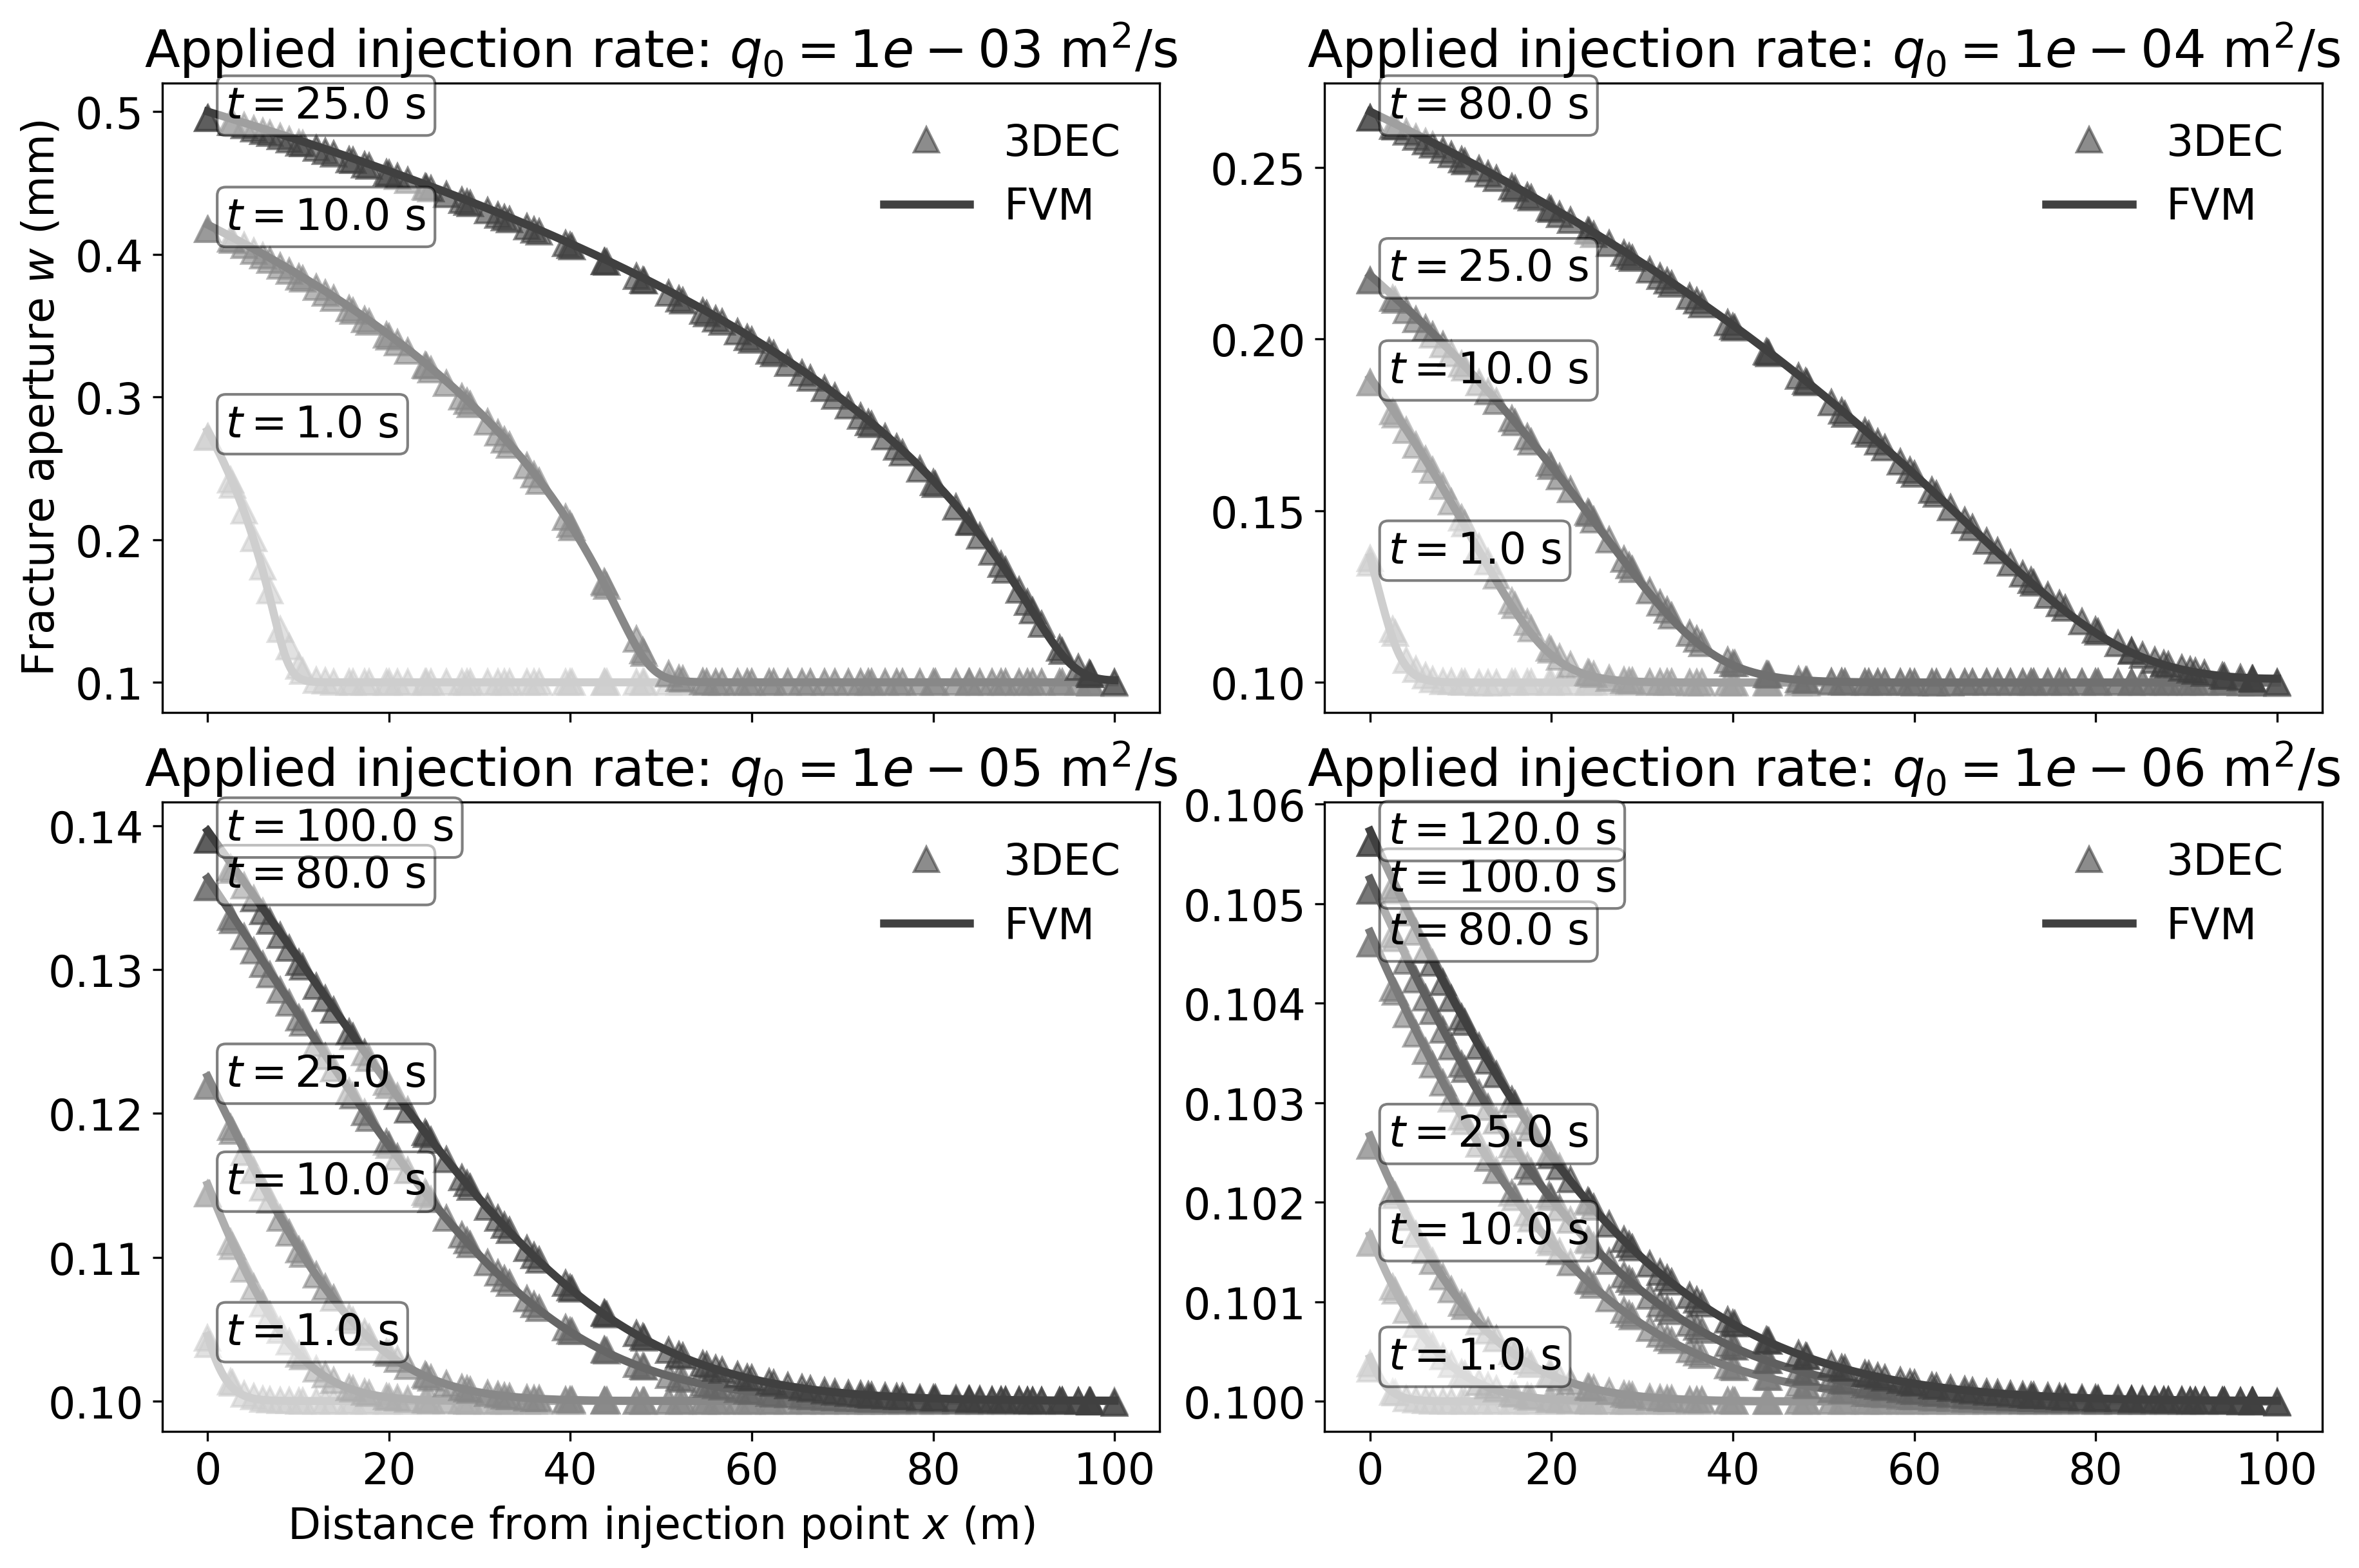

In [40]:
q_0_values = [1e-3, 1e-4, 1e-5, 1e-6]
t_values_for_q = [[1, 10, 25],
                  [1, 10, 25, 80],
                  [1, 10, 25, 80, 100],
                  [1, 10, 25, 80, 100, 120]]
t_fin_values = [25, 80, 100, 120]
fig, axes  = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True, sharex=True, dpi=300)
for i, (ax, q_0, t_values, t_fin) in enumerate(zip(axes.flatten(), q_0_values, t_values_for_q, t_fin_values)):
    plot_results_for_q(ax, results_3dec, results_fvm, q_0, t_values, t_fin)
axes[1,0].set_xlabel(r"Distance from injection point $x$ (m)")
axes[0,0].set_ylabel(r"Fracture aperture $w$ (mm)")
plt.savefig(f"{work_dir}/figures/aperture.png")
plt.show()

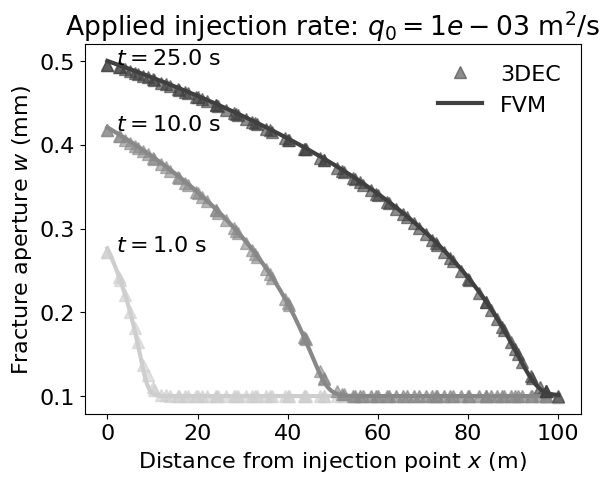

In [4]:
q_0 = 1e-3
t_values = [1, 10, 25]
t_fin = 25

fig, ax = plt.subplots()
plot_results_for_q(ax, results_3dec, results_fvm, q_0, t_values, t_fin)
plt.show()

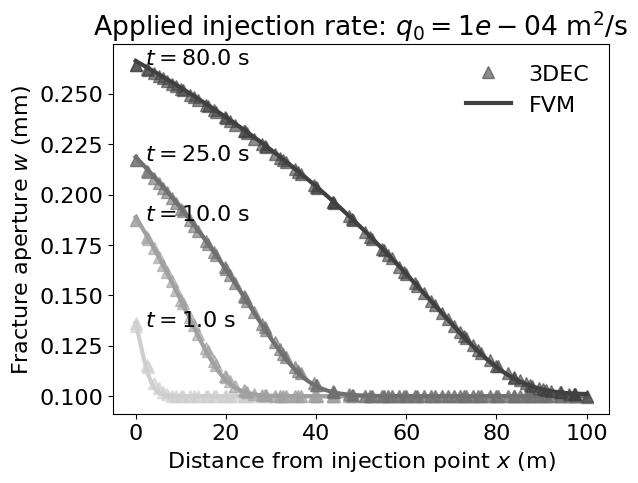

In [5]:
q_0 = 1e-4
t_values = [1, 10, 25, 80]
t_fin = 80

fig, ax = plt.subplots()
plot_results_for_q(ax, results_3dec, results_fvm, q_0, t_values, t_fin)
plt.show()

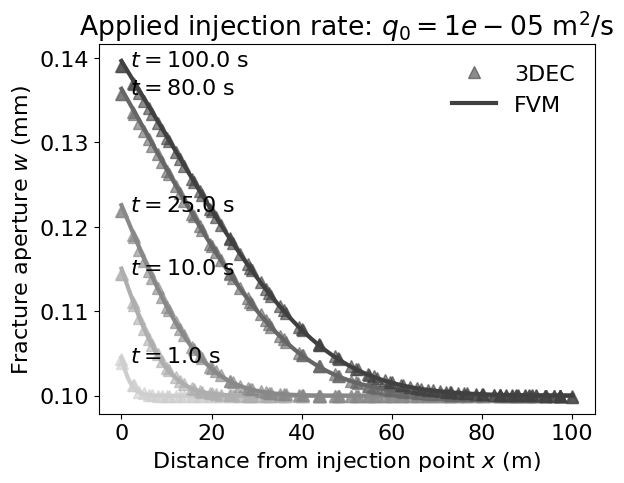

In [6]:
q_0 = 1e-5
t_values = [1, 10, 25, 80, 100]
t_fin = 100

fig, ax = plt.subplots()
plot_results_for_q(ax, results_3dec, results_fvm, q_0, t_values, t_fin)
plt.show()

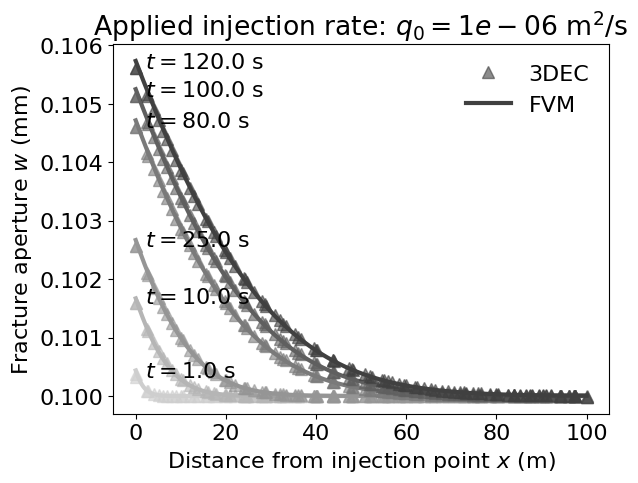

In [7]:
q_0 = 1e-6
t_values = [1, 10, 25, 80, 100, 120]
t_fin = 120

fig, ax = plt.subplots()
plot_results_for_q(ax, results_3dec, results_fvm, q_0, t_values, t_fin)
plt.show()